<a href="https://colab.research.google.com/github/BOOBESH7/BOOBESH7/blob/main/project_SA(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
uploaded = files.upload()

Saving all-data.csv to all-data (2).csv


In [20]:

!pip install -q scikit-learn matplotlib seaborn


In [21]:
import pandas as pd
import io

# Load dataset
filename = next(iter(uploaded))  # Gets the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, encoding='latin-1') # Changed encoding to 'latin-1'

# Rename columns for clarity before accessing them
df = df.rename(columns={0: 'sentiment', 1: 'text'})

# Preview the data
print(df.head())
# Example fix in pandas

   sentiment         text         2  \
0       2401  Borderlands  Positive   
1       2401  Borderlands  Positive   
2       2401  Borderlands  Positive   
3       2401  Borderlands  Positive   
4       2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


Detected classes: ['negative', 'neutral', 'positive']

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      0.06      0.12       110
     neutral       0.68      0.99      0.80       571
    positive       0.69      0.30      0.42       289

    accuracy                           0.68       970
   macro avg       0.79      0.45      0.45       970
weighted avg       0.72      0.68      0.61       970



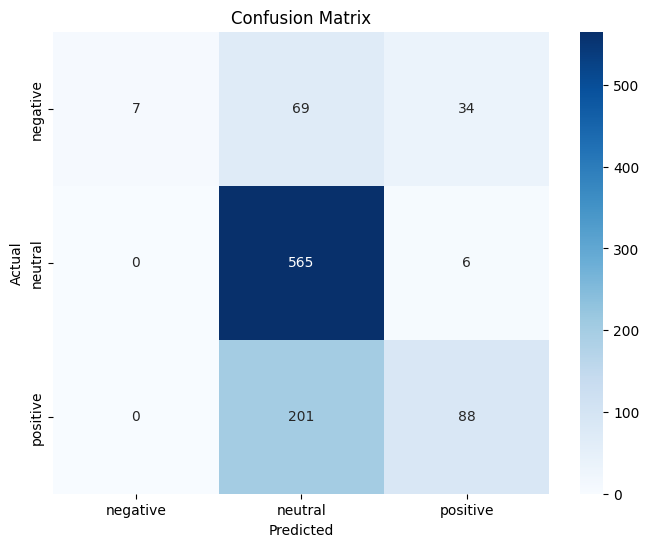

In [28]:
# STEP 1: Import Required Libraries
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# STEP 2: Load and Prepare Dataset
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, encoding='latin-1')

# Dynamic Column Mapping based on common structures
# Structure 1: ID, Entity, Sentiment, Text (4 cols)
# Structure 2: Sentiment, Text (2 cols)
if df.shape[1] >= 4:
    df = df.rename(columns={2: 'sentiment', 3: 'text'})
elif df.shape[1] == 2:
    df = df.rename(columns={0: 'sentiment', 1: 'text'})
else:
    # Fallback to last column as text and second to last as sentiment
    df = df.rename(columns={df.columns[-1]: 'text', df.columns[-2]: 'sentiment'})

# Keep only necessary columns and drop missing values
df = df[['sentiment', 'text']].copy()
df = df.dropna(subset=['text', 'sentiment'])

# Ensure sentiment is string and normalized
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()

# Get unique classes
classes = sorted(df['sentiment'].unique().tolist())
print(f"Detected classes: {classes}")

# STEP 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# STEP 4: Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# STEP 5: Model Training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# STEP 6: Predictions
y_pred = model.predict(X_test_vec)

# STEP 7: Evaluation Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()